# Лабораторная работа №3.
## Выполнил: Бобровских Глеб.
## Вариант 4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import fsolve
from scipy.misc import derivative

## Задание 1.
Найти с точностью корни системы нелинейных уравнений $\varepsilon = 10^{6}$:

$\begin{equation*}
\begin{cases}
f_1(x_1, x_2) = 0,\\
f_2(x_1, x_2) = 0\\
\end{cases}
\end{equation*}$


используя **метод Ньютона для системы нелинейных уравнений**.

Система из варианта 4:

$\begin{equation*}
\begin{cases}
\cos x_1 + x_2 - 1.5 = 0\\ 
2x_1 - \sin(x_2 - 0.5) - 1 = 0\\
\end{cases}
\end{equation*}$


**Зададим систему нелинейных уравнений.**

In [2]:
def equations(p):
    x, y = p[0], p[1]
    return np.array([np.cos(x) + y - 1.5, 2*x - np.sin(y - 0.5) - 1])

**Локализуем корни системы уравнений.**


Приведем уравнения системы к виду $x_1 = g(x_2)$ и отобразим на плоскости.

In [3]:
def f_1(x):
    return 1.5 - np.cos(x) 
def f_2(x):
    return np.arcsin(2*x - 1) + 0.5

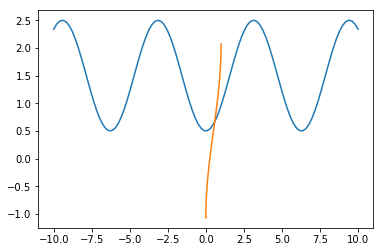

In [4]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f_1(x))
x = np.linspace(0, 1, 100)
plt.plot(x, f_2(x))

**Определим вспомогательную функцию для поиска производной функции двух переменных.**

In [5]:
# find partial derivative for function of multiple variables
# f - array with functions;
# f_num - number of function in system;
# var - variable for which we count partial derivative;
# point - list of point where to find derivative;
def partial_derivative(func, f_num=0, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(args)[f_num]
    return derivative(wraps, point[var], dx = 1e-6)
# find jacobian for system of functions
# f - array with functions;
# x - point where to find jacobian;
# num - amount of functions in system;
def Jacobian(f, x, num=2):
    jacob = np.zeros((2, 2))
    for i in range(num):
        for j in range(num):
            jacob[i, j] = partial_derivative(f, i, j, x)
    return jacob

### Метод Ньютона (для систем нелинейных уравнений).
Имеем приближение $x_{i}$ к корню системы и мы ищем лучшее приближение $x_{i+1}$ путем аппроксимации функции $F(x_{i+1})$ линейной функцией и решением соответствующей системы теперь уже линейных уравнений. Мы аппроксимируем нелинейную задачу $F(x_{i+1})=0$ линейной:

$$F(x_{i}) + J(x_{i})(x_{i+1} - x_{i}) = 0, \qquad (1)$$

где $ J(x_{i})$ - *якобиан* системы $F(x_{i})$

уравнение (1) является линейной системой с матрицей коэффициентов $J$ и вектором $F(x_{i})$. Переписывая в другой форме, получим:

$$J(x_{i})\delta=-F(x_{i}), \delta = (x_{i+1} - x_{i})$$

На каждой итерации метода Ньютона выполняем следующие шаги:

1. Решаем $J(x_{i})\delta=-F(x_{i})$ для $\delta$.
2. Выражаем $x_{i+1}=x_{i}+\delta$



In [18]:
def newton_for_nonlinear(F, J, x, norm, eps):
    # ||F|| < eps - stop criterion.
    count = 0
    while abs(np.linalg.norm(F(x), ord=norm)) > eps and count < 100:
        delta = np.linalg.solve(J(F, x), -1*F(x))
        x = x + delta
        count += 1
    return x, count


In [19]:
x_2, n_2 = newton_for_nonlinear(equations, Jacobian, x=[0.0, -0.5], norm=2, eps=1e-6)

In [20]:
print('Norm - 2, Roots - [{:.7e}, {:.7e}], number of iterations - {:d}'.format(x_2[0], x_2[1], n_2))

Norm - 2, Roots - [5.8192615e-01, 6.6459448e-01], number of iterations - 4


In [22]:
x_inf, n_inf = newton_for_nonlinear(equations, Jacobian, x=[0.0,-0.5], norm=np.inf, eps=1e-6)

print('Norm - inf, Roots - [{:.7e}, {:.7e}], number of iterations - {:d}'.format(x_inf[0], x_inf[1], n_inf))

Norm - inf, Roots - [5.8192615e-01, 6.6459448e-01], number of iterations - 4


In [17]:
x, y = fsolve(equations, [0, -1])

print('Roots - [{:.7e}, {:.7e}]'.format(x, y))
print('Norm of error:', np.linalg.norm([x, y] - x_inf, ord=np.inf))
print('Norm of error:', np.linalg.norm([x, y] - x_2, ord=2))

Roots - [5.8192615e-01, 6.6459448e-01]
Norm of error: 5.99353899844e-12
Norm of error: 6.60380300271e-12
